In [1]:
import requests
import os

In [2]:
from conf import databases, url, data_dir

In [5]:
def download_file(url, path):
    r = requests.get(url, stream=True)
    if r.status_code == 200:
        with open(path, 'wb') as f:
            for chunk in r.iter_content(1024):
                f.write(chunk)

for db, ids in databases:
    if not os.path.exists(data_dir + db):
        os.makedirs(data_dir + db)
    for i in ids:
        for ext in ['dat', 'hea', 'atr']:
            fp = db + '/' + i + '.' + ext
            download_file(url + fp, data_dir + fp)

In [3]:
import wfdb
import numpy
import json

In [4]:
for db, ids in databases:
    for i in ids:
        f = data_dir + db + '/' + i
        print(f)
        sig, fields = wfdb.srdsamp(f)
        ann = wfdb.rdann(f, 'atr')
        tmp = numpy.stack([
            ann.annsamp, 
            numpy.asarray(ann.anntype), 
            ann.subtype, 
            ann.chan, 
            ann.num, 
            numpy.asarray(ann.aux)
        ])
        with open(f + '.json', 'w+') as f:
            json.dump(fields, f)

data/mitdb/100
data/mitdb/101
data/mitdb/102
data/mitdb/103
data/mitdb/104
data/mitdb/105
data/mitdb/106
data/mitdb/107
data/mitdb/108
data/mitdb/109
data/mitdb/111
data/mitdb/112
data/mitdb/113
data/mitdb/114
data/mitdb/115
data/mitdb/116
data/mitdb/117
data/mitdb/118
data/mitdb/119
data/mitdb/121
data/mitdb/122
data/mitdb/123
data/mitdb/124
data/mitdb/200
data/mitdb/201
data/mitdb/202
data/mitdb/203
data/mitdb/205
data/mitdb/207
data/mitdb/208
data/mitdb/209
data/mitdb/210
data/mitdb/212
data/mitdb/213
data/mitdb/214
data/mitdb/215
data/mitdb/217
data/mitdb/219
data/mitdb/220
data/mitdb/221
data/mitdb/222
data/mitdb/223
data/mitdb/228
data/mitdb/230
data/mitdb/231
data/mitdb/232
data/mitdb/233
data/mitdb/234
data/afdb/04015
data/afdb/04043
data/afdb/04048
data/afdb/04126
data/afdb/04746
data/afdb/04908
data/afdb/04936
data/afdb/05091
data/afdb/05121
data/afdb/05261
data/afdb/06426
data/afdb/06453
data/afdb/06995
data/afdb/07162
data/afdb/07859
data/afdb/07879
data/afdb/07910
data/afd

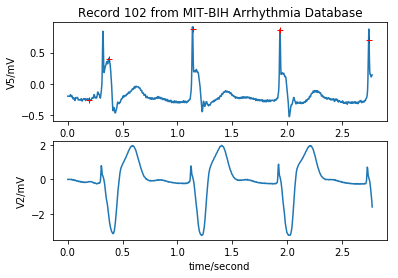

In [38]:
record = wfdb.rdsamp('data/mitdb/102', sampfrom=0, sampto=1000)
ann = wfdb.rdann('data/mitdb/102', 'atr', sampfrom=0, sampto=1000)
wfdb.plotrec(record, annotation=ann, title='Record 102 from MIT-BIH Arrhythmia Database', timeunits='seconds')

In [32]:
tmp = {}
l = 0

db, ids = databases[0]
for i in ids:
    f = data_dir + db + '/' + i
    record = wfdb.rdsamp(f)
    ann = wfdb.rdann(f, 'atr')
    for v in ann.chan:
        s = record.signame[v]
        if s not in tmp:
            tmp[s] = 0
        tmp[s] += 1
print(tmp)
print(l)


{'MLII': 106254, 'V5': 6393}
31200000
